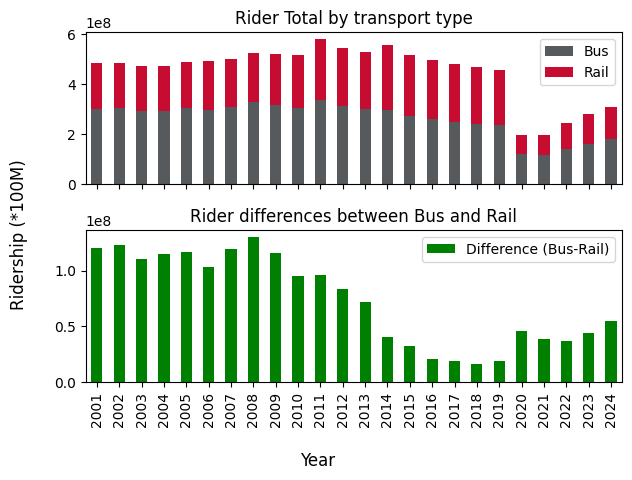

In [ ]:
#data obtained from "https://catalog.data.gov/dataset/cta-ridership-daily-boarding-totals"
# github profile: "https://github.com/eicchen02"

import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

#reads csv and parses it into Dataframe, adds additional column for just year
def parse_CTA_ridership(filename):
    df = pd.read_csv(filename, index_col = False)
    
    #creates series containing the date in "date" format
    date_series = df.loc[:,'service_date'].apply(str_to_date)

    #adds the year of the date to the dataframe
    df['year'] = date_series.map(lambda x: x.strftime('%Y'))
    return df

# date_string is date string with format "mm/dd/yyyy", outputs the string reinterpreted as a "date" data type
# raises an exception if date provided is not expected format
def str_to_date(date_string):
    try:
        return datetime.strptime(date_string, '%m/%d/%Y')
    except:
        raise Exception("Check date input format to ensure it is string in format of \"mm/dd/yyyy\"")

#Processes and outputs graph of bus and rail ridership as well as their delta
def graph_ridership_per_year(df):
    
    #creates new data frame to hold relevant data
    output_df = pd.DataFrame(columns=["year", "bus", "rail_boardings", "difference"])
    index = 0

    #raw data has 2017 out of place, so we take the sorted unique numbers to iterate through to get values
    for year in df["year"].sort_values().unique():
        year_df = df[df['year'] == str(year)]
        bus_sum = year_df["bus"].sum()
        rail_sum = year_df["rail_boardings"].sum()
        difference = bus_sum - rail_sum
        output_df.loc[index] = [year,bus_sum, rail_sum, difference]
        index = index + 1

    #setting plot options using pandas built-in plot function which uses pyplot

    #!pandas' stack option works incorrectly when using subplots, so this is the workaround
    #! I have raised the issue on the pandas repo and assigned them to myself, they have been confirmed.
    #https://github.com/pandas-dev/pandas/issues/61018#issuecomment-2692744744
    #https://github.com/pandas-dev/pandas/issues/61019#issuecomment-2692743444
    #https://github.com/pandas-dev/pandas/issues/61020#issuecomment-2692798488

    fig, axes = plt.subplots(2,1, sharex=True)
    
    #formated this way to fit page limit
    #CTA bus sign and Red Line colors :)
    output_df.plot(ax=axes[0], x="year", y=['bus','rail_boardings'], kind="bar", stacked=True, title="Rider Total by transport type",label=['Bus', 'Rail'], color=["#565a5c", "#c60c30"],
    )
    
    #df.plot has no built in way of disabling just the xlabel, so it's set to nothing
    output_df.plot(ax=axes[1], x="year", y="difference", kind="bar", title="Rider differences between Bus and Rail", color='g', label='Difference (Bus-Rail)', xlabel=""
    )

    fig.supxlabel("Year")
    fig.supylabel("Ridership (*100M)")
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    ridership_df = parse_CTA_ridership("CTA_-_Ridership_-_Daily_Boarding_Totals.csv")
    graph_ridership_per_year(ridership_df)